<a href="https://colab.research.google.com/github/semihcinar/DL/blob/semihcinar%2FSQL-Gunluk-Test1/NLP_4_(NLP_Application_with_DL)_15_11_2021_COLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NLP with DL (Standart)

> Girintili blok
Derste Yapıldı. Hata yok


## Import libraries

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path="/content/drive/MyDrive/clarus/DL/DuyguAnalizi/hepsiburada.csv"

In [ ]:
df = pd.read_csv(path)

In [ ]:
df

,Rating,Review
0,1,3 yıldır tık demedi. :)
1,1,3 yıldır kullanıyorum müthiş
2,1,Ürün bugün elime geçti çok fazla inceleme fırs...
3,1,Almaya karar verdim. Hemencecik geldi. Keyifle...
4,1,Günlük kullanımınızı çok çok iyi karsılıyor kı...
...,...,...
243492,1,fiyatına göre güzel
243493,1,Ürün kullanışlı iş görüyor fazlasıyla eşime al...
243494,1,"Hızlı Kargo, güzel ürün"
243495,1,telefon başarılı hızlı bir cihaz sadece beyaz...


## Tokenization

In [ ]:
X = df['Review'].values
y = df['Rating'].values

In [ ]:
num_words = 15000 # corpusta geçen en fazla kullanılan ilk 15.000 kelimeyi(tokeni) alacağız gerisini yok sayacağız. 
# None değeri atanırsa tüm kelimeler dikkate alınır.
tokenizer = Tokenizer(num_words=num_words) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890'

In [ ]:
tokenizer.fit_on_texts(X)

## Creating word index

In [ ]:
tokenizer.word_index

{'çok': 1,
 'bir': 2,
 've': 3,
 'ürün': 4,
 'bu': 5,
 'iyi': 6,
 'güzel': 7,
 'için': 8,
 'tavsiye': 9,
 'ederim': 10,
 'daha': 11,
 'ama': 12,
 'da': 13,
 'gayet': 14,
 'hızlı': 15,
 'teşekkürler': 16,
 'aldım': 17,
 'de': 18,
 'ürünü': 19,
 'gibi': 20,
 'yok': 21,
 'uygun': 22,
 'olarak': 23,
 'kaliteli': 24,
 'en': 25,
 '2': 26,
 'kargo': 27,
 'fiyat': 28,
 'elime': 29,
 'kadar': 30,
 'ile': 31,
 'göre': 32,
 'geldi': 33,
 'var': 34,
 'hepsiburada': 35,
 'ben': 36,
 'gerçekten': 37,
 '1': 38,
 'fiyata': 39,
 'gün': 40,
 'sonra': 41,
 'cok': 42,
 'kesinlikle': 43,
 'telefon': 44,
 'biraz': 45,
 'hiç': 46,
 'ulaştı': 47,
 'memnun': 48,
 'hem': 49,
 'değil': 50,
 'kullanışlı': 51,
 '3': 52,
 'mükemmel': 53,
 'oldu': 54,
 'kullanıyorum': 55,
 'önce': 56,
 'sipariş': 57,
 'tek': 58,
 'her': 59,
 'bence': 60,
 'harika': 61,
 'kalitesi': 62,
 'bi': 63,
 'ayrıca': 64,
 '5': 65,
 'teşekkür': 66,
 'fiyatı': 67,
 'olması': 68,
 'ne': 69,
 'herkese': 70,
 'bile': 71,
 'uzun': 72,
 'süper': 73,

In [ ]:
len(tokenizer.word_index)

217983

## Converting tokens to numeric

In [ ]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [ ]:
X[105]

'Logitech ürünlerinin geneli kalite olarak çok iyidir. Adedini tam saymadım ama 10 un üzerinde kendime akrabalarıma arkadaşlarıma almışımdır hepside memnunlar. İhtiyacı olan kaçırmasın başkada ürün aramasın derim.'

In [ ]:
print(X_num_tokens[105])

[1816, 5360, 131, 23, 1, 1849, 74, 12, 118, 1533, 297, 745, 3216, 13402, 6326, 5030, 2463, 113, 2534, 8858, 4, 143]


In [ ]:
len(X_num_tokens[105])

22

In [ ]:
len(X_num_tokens[106])

18

In [ ]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

## Maximum number of tokens for all documents

In [ ]:
num_tokens.mean()

21.36101060793357

In [ ]:
num_tokens.max()

298

In [ ]:
num_tokens.argmax() # listedeki en uzun yorumun indexini argmax ile bulabiliyoruz.

21941

In [ ]:
X[21941]

'Özellikle bu kısma yazıyorum iyice okuyunuz,cihazın hızı çok iyi.Isınma normal boyutlarda.Kamerası elinizi sabit tutarsanız ve gündüz çok net gece ise çok net çekmez.Görüntülü konuşma özelliği yok ancak uygulama ile olur,anten çekimi gayet iyi.Parmak izi okuyucusu gayet hızlı bazen tuşu silmenizi istiyor ve okuyamıyor kirden vs...Ön kamera da tatmin edici,çekim esnasında ekran beyaz ışık vererek flaş görevi görür.Batarya bana 1 hafta gidiyor sık kullanımda ise 2-3 gün gidiyor.Hızlı şarj 1 saatte doluyor , şekilleri ele oturuyor ve şık bir görüntü var.Telefonu aldığım gün gittim ve ilk girdiğim yerden ekran koruyucu ve kılıf buldum.Kulaklık sesi çok net ve yüksek ancak kendi hoparlörü biraz zayıf sesi.Ekrana bakarken açık kalma özelliği yok.Diğer akıllı cihaz özellikleri %90 ı bu cihazda mevcut.Güç tasarrufu 2 ayrı modu var ve çok başarılı çalışıyor.4gb ram var genelde yarısı boş kalıyor.Bir de yeni cihazların çoğu titreşimi az ve sesi de az çıkıyor.Bu cihaz da içine dahil...Bu cihazla

In [ ]:
sum(num_tokens < 10)

71440

In [ ]:
max_tokens = 61

In [ ]:
sum(num_tokens < max_tokens) / len(num_tokens)

0.9598968365113328

## Fixing token counts of all documents (pad_sequences)

In [ ]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [ ]:
X_pad.shape

(243497, 61)

In [ ]:
np.array(X_num_tokens[800])

array([  19,  341,   52,  194,   30,   54, 7992,   55,  209,  603, 7887,
          3,   36,  114,  164,  479,   85,    1, 1682,  782,   30,    2,
        380,  326,    3,    1,   81,  132,  562,    9,   10])

In [ ]:
X_pad[800]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,   19,  341,   52,
        194,   30,   54, 7992,   55,  209,  603, 7887,    3,   36,  114,
        164,  479,   85,    1, 1682,  782,   30,    2,  380,  326,    3,
          1,   81,  132,  562,    9,   10], dtype=int32)

In [ ]:
np.array(X_num_tokens[212558])

array([ 1789,  2440,     7,    44,  1837,    38,    84,   250,    85,
          84,  2181,    41,    26,   134,   209,     3,   716,    11,
         795,     5,  1478,    58,  1478,    72,   181,  1943,    44,
        1433,  4082,   947,   625,   636,    26,  2817,  5518,  3515,
         241,  1158,  1174,   454,   874,   755,     1,     7,     3,
          45,  2555,     1,     6,   585,  1068,  1160,   170,   811,
        2440,  1455,   472,  1785,  2704,  2223,   182,    49,     1,
           6,   188,     1,   402,    65,    65,  2330,   345, 13609,
         104,  1427,    46,    52,   261,    63,  3515,   260,   232,
        2108,    50,    12,     2, 10826,  5593,     5,    31, 12274,
        4819,     2,  2731,    60,    28,   111,  9906,     1,    79,
         571,  3637,   546,  5455,     1,     6,  2714,   373,   118,
         604,   250,  7804,  5277,  6164,  1263,    23,  2871,    14,
           6,   133,    56,  8334,    20,  3515,  1174,   170,    14,
           3,   402,

In [ ]:
X_pad[212558]

array([ 367,    1,   24,   80,  133,   90,  245, 2219, 9352,    5,   39,
        315,   25,    6,   44,  245, 2233,    8, 9698,  167,   37,  275,
        232,    5, 3979,  134, 7919, 2118,  310,  437, 4901,   36,   25,
        138,  940,  590,    3, 1625,  590,   12,    5,  874,  335,    2,
       2204,   17,  501,  420,  961,   17,   36, 4289, 2091, 2740,   60,
          1,   96,    9,   10,  898, 4239], dtype=int32)

## Converting numeric tokens to string

In [ ]:
index = tokenizer.word_index
inverse_map = dict(zip(index.values(), index.keys()))
inverse_map

{1: 'çok',
 2: 'bir',
 3: 've',
 4: 'ürün',
 5: 'bu',
 6: 'iyi',
 7: 'güzel',
 8: 'için',
 9: 'tavsiye',
 10: 'ederim',
 11: 'daha',
 12: 'ama',
 13: 'da',
 14: 'gayet',
 15: 'hızlı',
 16: 'teşekkürler',
 17: 'aldım',
 18: 'de',
 19: 'ürünü',
 20: 'gibi',
 21: 'yok',
 22: 'uygun',
 23: 'olarak',
 24: 'kaliteli',
 25: 'en',
 26: '2',
 27: 'kargo',
 28: 'fiyat',
 29: 'elime',
 30: 'kadar',
 31: 'ile',
 32: 'göre',
 33: 'geldi',
 34: 'var',
 35: 'hepsiburada',
 36: 'ben',
 37: 'gerçekten',
 38: '1',
 39: 'fiyata',
 40: 'gün',
 41: 'sonra',
 42: 'cok',
 43: 'kesinlikle',
 44: 'telefon',
 45: 'biraz',
 46: 'hiç',
 47: 'ulaştı',
 48: 'memnun',
 49: 'hem',
 50: 'değil',
 51: 'kullanışlı',
 52: '3',
 53: 'mükemmel',
 54: 'oldu',
 55: 'kullanıyorum',
 56: 'önce',
 57: 'sipariş',
 58: 'tek',
 59: 'her',
 60: 'bence',
 61: 'harika',
 62: 'kalitesi',
 63: 'bi',
 64: 'ayrıca',
 65: '5',
 66: 'teşekkür',
 67: 'fiyatı',
 68: 'olması',
 69: 'ne',
 70: 'herkese',
 71: 'bile',
 72: 'uzun',
 73: 'süper',

In [ ]:
def tokens_to_string(tokens):
    words = [inverse_map[token] for token in tokens if token!=0]
    text = ' '.join(words)
    return text

In [ ]:
X[800]

'ürünü alalı 3 hafta kadar oldu. aralıksız kullanıyorum bilgisyarım sürekli açık durur ve ben günde yaklaşık 12 saat başındayım mousesu çok kullanırım. şimdiye kadar bir problem yaşamadım ve çok memnunum almak isteyenlere tavsiye ederim.'

In [ ]:
tokens_to_string(X_num_tokens[800])

'ürünü alalı 3 hafta kadar oldu aralıksız kullanıyorum sürekli açık durur ve ben günde yaklaşık 12 saat çok kullanırım şimdiye kadar bir problem yaşamadım ve çok memnunum almak isteyenlere tavsiye ederim'

## Train Set Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=101)

## Modelling

In [ ]:
model = Sequential()

In [ ]:
embedding_size = 100

In [ ]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens,
                    name='embedding_layer'))

In [ ]:
# pip install -U numpy==1.19.5

In [ ]:
model.add(GRU(units=48, return_sequences=True))
model.add(GRU(units=24, return_sequences=True))
model.add(GRU(units=12))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
optimizer = Adam(lr=0.004)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

https://stats.stackexchange.com/questions/328926/how-many-parameters-are-in-a-gated-recurrent-unit-gru-recurrent-neural-network

In [ ]:
model.summary() 
# 3 x (n2 + nm + 2n) m= input, n= output
# (48*48 + 100*48 +2*48)*3 ==> m = 100, n = 48
# (24*24 + 48*24  +2*24)*3 ==> m =  48, n = 24
# (12*12 + 24*12  +2*12)*3 ==> m =  24, n = 12

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding)  (None, 61, 100)          1500000   
                                                                 
 gru (GRU)                   (None, 61, 48)            21600     
                                                                 
 gru_1 (GRU)                 (None, 61, 24)            5328      
                                                                 
 gru_2 (GRU)                 (None, 12)                1368      
                                                                 
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 1,528,309
Trainable params: 1,528,309
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="auto", 
                           verbose=1, patience = 5, restore_best_weights=True)

In [ ]:
pd.Series(y_train).value_counts(normalize=True)

1    0.943834
0    0.056166
dtype: float64

In [ ]:
weights = {0:95, 1:5}

In [ ]:
model.fit(X_train, y_train, epochs=25, batch_size=256, class_weight=weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/25
761/761 [==============================] - 54s 57ms/step - loss: 3.2007 - recall: 0.8529 - val_loss: 0.2928 - val_recall: 0.8740
Epoch 2/25
761/761 [==============================] - 42s 55ms/step - loss: 1.7500 - recall: 0.9308 - val_loss: 0.2301 - val_recall: 0.9130
Epoch 3/25
761/761 [==============================] - 42s 55ms/step - loss: 1.1154 - recall: 0.9572 - val_loss: 0.2005 - val_recall: 0.9353
Epoch 4/25
761/761 [==============================] - 42s 55ms/step - loss: 0.7803 - recall: 0.9708 - val_loss: 0.2451 - val_recall: 0.9266
Epoch 5/25
761/761 [==============================] - 42s 55ms/step - loss: 0.6309 - recall: 0.9771 - val_loss: 0.1693 - val_recall: 0.9574
Epoch 6/25
761/761 [==============================] - 42s 55ms/step - loss: 0.5056 - recall: 0.9827 - val_loss: 0.2429 - val_recall: 0.9430
Epoch 7/25
761/761 [==============================] - 42s 55ms/step - loss: 0.4606 - recall: 0.9848 - val_loss: 0.2378 - val_recall: 0.9422
Epoch 8/25
761/761 [

## Model evaluation

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head(10)

""


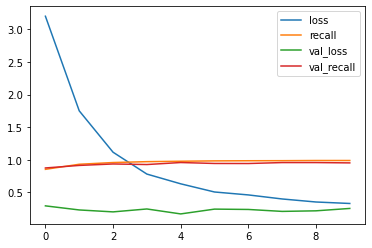

In [ ]:
model_loss.plot()

In [ ]:
model.evaluate(X_train, y_train)

6088/6088 [==============================] - 109s 18ms/step - loss: 0.0539 - recall: 0.9813


[0.053851231932640076, 0.9812896847724915]

In [ ]:
model.evaluate(X_test, y_test)

1522/1522 [==============================] - 27s 18ms/step - loss: 0.1693 - recall: 0.9574


[0.16931074857711792, 0.9574023485183716]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = (model.predict(X_train) >= 0.5).astype("int32")

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

[[ 10849     92]
 [  3440 180416]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.99      0.86     10941
           1       1.00      0.98      0.99    183856

    accuracy                           0.98    194797
   macro avg       0.88      0.99      0.93    194797
weighted avg       0.99      0.98      0.98    194797



In [ ]:
y_pred = (model.predict(X_test) >= 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

[[ 2056   679]
 [ 1958 44007]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.51      0.75      0.61      2735
           1       0.98      0.96      0.97     45965

    accuracy                           0.95     48700
   macro avg       0.75      0.85      0.79     48700
weighted avg       0.96      0.95      0.95     48700



In [ ]:
y_test

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
y_pred

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [ ]:
y_pred2 = np.array([i[0] for i in y_pred])
y_pred2

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
incorrect = np.where(y_test != y_pred2)
incorrect

(array([   10,    26,    38, ..., 48625, 48678, 48688]),)

In [ ]:
incorrect = incorrect[0]
incorrect

array([   10,    26,    38, ..., 48625, 48678, 48688])

In [ ]:
len(incorrect)

2637

In [ ]:
idx = incorrect[0]
idx

10

In [ ]:
text = X_test[idx]
text

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,  891,  327,  171, 1491,
         84,  456,   31,  171,  466,   74,   84,   54,  266,  241, 1158,
       1917,   52,  371,  327,  171, 2979,   13,   65,  371,   84,  129,
        361,   84, 1917, 3536,   72,    2,  208,  360,   34,    5,    4,
       1906,  120, 2498,  132,    1, 2893], dtype=int32)

In [ ]:
tokens_to_string(text)

'xiaomi mi 6 nın şarj cihazı ile 6 saatte tam şarj oldu iphone 7 plus ı 3 kere mi 6 yı da 5 kere şarj ettim hala şarj ı bitmedi uzun bir kullanım süresi var bu ürün varken başka powerbank almak çok saçma'

In [ ]:
y_pred[idx]

array([0], dtype=int32)

In [ ]:
y_test[idx]

1

In [ ]:
y_pr = model.predict(X_test)

In [ ]:
y_pr[idx]

array([0.41321728], dtype=float32)

## Predicton

In [ ]:
review1 = "çok beğendim herkese tavsiye ederim"
review2 = "süper ürün aynı gün elime geçti"
review3 = "büyük bir hayal kırıklığı yaşadım bu ürünü bu markaya yakıştıramadım"
review4 = "kelimelerle tarif edilemez"
review5 = "tasarımı harika ancak kargo çok geç geldi ve ürün açılmıştı hayal kırıklığı gerçekten"
review6 = "hiç resimde gösterildiği gibi değil"
review7 = "kötü yorumlar gözümü korkutmuştu ancak hiçbir sorun yaşamadım teşekkürler"
review8 = "hiç bu kadar kötü bir satıcıya denk gelmemiştim ürün siparişimi iptal ediyorum"
review9 = "tam bir fiyat performans ürünü"
review10 = "beklediğim gibi çıkmadı"
review11 = "on numara beş yıldız"
review12 = "bu kargoyu biran önce bırakın. yoksa üründe sıkıntı yok"
review13 = "dün akşam evde arkadaşlarla toplandık. yedik, içtik, sohbet ettik. Sonra televizyonda Türkiye - İngiltere maçını seyrettik. Ancak, maç zehir oldu resmen televizyonun görüntü kalitesi çok kötü"
review14 = '1 gün gibi kısa bir sürede elime geçti. Ve bu fıyata süper bir ürün tavsiye ederim. Lakin eli büyük olan kişiler daha büyük modelini tercih edebilirler ortaboy ürün. Teşekkürler '
reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10, review11, review12, review13, review14]

In [ ]:
tokens = tokenizer.texts_to_sequences(reviews)

In [ ]:
tokens_pad = pad_sequences(tokens, maxlen=max_tokens)
tokens_pad.shape

(14, 61)

In [ ]:
model.predict(tokens_pad)

array([[0.97765416],
       [0.09057758],
       [0.00288148],
       [0.96063524],
       [0.21341284],
       [0.00433449],
       [0.970843  ],
       [0.95542055],
       [0.9826208 ],
       [0.00610692],
       [0.99508226],
       [0.27598467],
       [0.04402987],
       [0.99617755]], dtype=float32)